In [57]:
import pymssql
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
def  connect_SQL_server():
    db_settings = {"host": "127.0.0.1", "user": "sa", "password":"1234",  "database": "master"}
    conn = pymssql.connect(**db_settings)
    return conn

In [64]:
conn = connect_SQL_server()


company = '2609'
day_start = '20210101'
day_end = '20210706'
period = 5
budget = 5000

In [65]:
with conn.cursor() as cursor:
    cursor.execute("DROP TABLE return_table")
    cursor.execute("CREATE TABLE return_table(Date date, money int, share int, earn int, ROI float, DD float, price int)")
    cursor.execute("INSERT INTO return_table EXEC DCA_calculator '%s', '%s', '%s', %d, %d"%(company, day_start, day_end, period, budget))
    conn.commit()



In [66]:
cursor = conn.cursor()
command = f"""SELECT [date], [ROI], [DD], [money], [earn], [price] FROM return_table"""
cursor.execute(command)

date = []
roi = []
dd = []
price = []
money_linearity = []
money_actual = []

row = cursor.fetchone()
while row:
    date.append(row[0])
    roi.append(row[1])
    dd.append(row[2])
    money_linearity.append(row[3])
    money_actual.append(row[3] + row[4])
    price.append(row[5])
    row = cursor.fetchone()
print(min(dd))
print(price[0])
print(price[-1])

-0.40625
32
216


In [67]:
print(roi[-1])

4.331900387902806


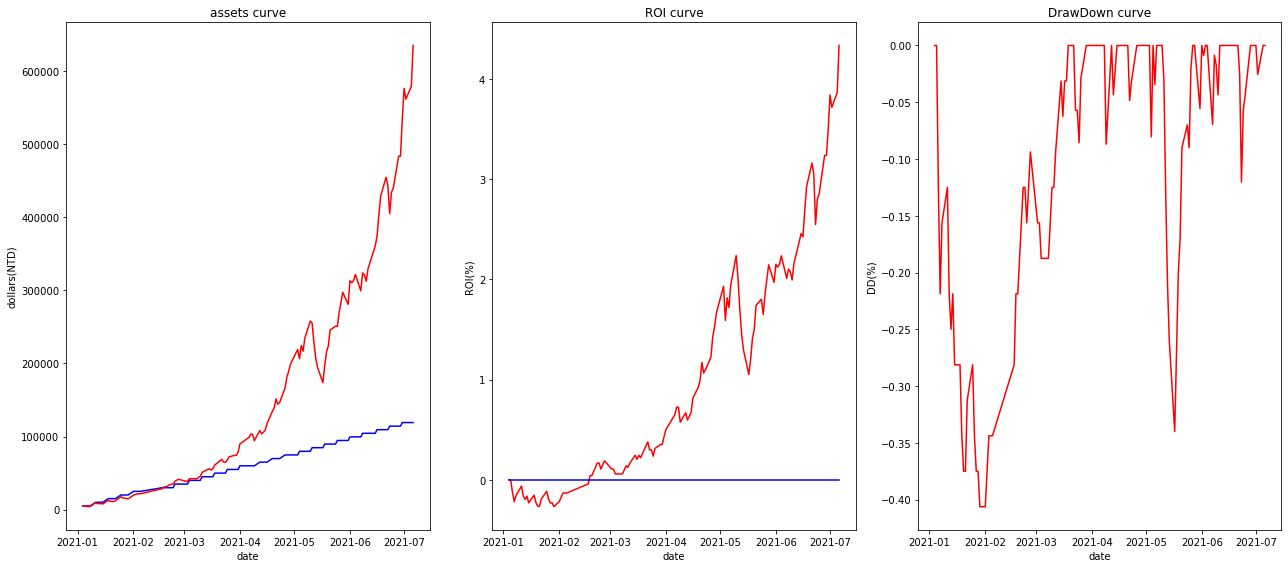

In [69]:

fig, axes = plt.subplots(1, 3, figsize = (18, 8))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
# ax4 = axes[1][1]

ax1.set_title('assets curve')
ax1.plot(date, money_linearity, color="blue")
ax1.plot(date, money_actual, color="red")
ax1.set_xlabel('date')
ax1.set_ylabel('dollars(NTD)')

ax2.set_title('ROI curve')
ax2.plot(date, roi, color="red")
ax2.plot(date, [0 for i in range(len(roi))], color="blue")
ax2.set_xlabel('date')
ax2.set_ylabel('ROI(%)')

ax3.set_title('DrawDown curve')
ax3.plot(date, dd, color="red")
ax3.set_xlabel('date')
ax3.set_ylabel('DD(%)')

# ax4.set_title('Price curve')
# ax4.plot(date, price, color="red")
# ax4.set_xlabel('date')
# ax4.set_ylabel('dollars(NTD)')

fig.tight_layout()
plt.savefig("./%s_%s_%s.pdf"%(company, day_start, day_end))